In [40]:
import random
import math
import numpy as np
import pandas as pd
import timeit

In [2]:
# Define the Continuous Peaks problem class
class ContinuousPeaksProblem:
    def __init__(self, length, t):
        self.length = length
        self.t = t

    def fitness(self, state):
        def count_continuous_peaks(arr):
            max_continuous = 0
            current_continuous = 0
            for bit in arr:
                if bit == 1:
                    current_continuous += 1
                    max_continuous = max(max_continuous, current_continuous)
                else:
                    current_continuous = 0
            return max_continuous

        peak_count = count_continuous_peaks(state)

        if peak_count >= self.t:
            return len(state) + peak_count
        else:
            return peak_count

In [3]:
class OneMaxProblem:
    def __init__(self, length):
        self.length = length

    def fitness(self, state):
        return sum(state)

# Example usage:
one_max_problem = OneMaxProblem(length=20)


In [29]:
class FourPeaksProblem:
    def __init__(self, length, t):
        self.length = length
        self.t = t

    def fitness(self, state):
        def count_continuous_ones(arr):
            max_continuous = 0
            current_continuous = 0
            for bit in arr:
                if bit == 1:
                    current_continuous += 1
                    max_continuous = max(max_continuous, current_continuous)
                else:
                    current_continuous = 0
            return max_continuous

        peak_count = count_continuous_ones(state)

        if peak_count >= self.t and len(state) - peak_count > self.t:
            return len(state) + self.t
        else:
            return peak_count

In [4]:
class FlipFlopProblem:
    def __init__(self, length):
        self.length = length

    def fitness(self, state):
        fitness = 0
        for i in range(self.length - 1):
            if state[i] != state[i + 1]:
                fitness += 1
        return fitness

# Example usage:
flip_flop_problem = FlipFlopProblem(length=20)


In [41]:
def random_hill_climb(problem, max_iters=1000, max_attempts=10, random_state=None):
    random.seed(random_state)
    
    best_solution = None
    best_fitness = float("-inf")
    
    start_time = timeit.default_timer()  # Record the start time
    
    for _ in range(max_iters):
        current_solution = [random.randint(0, 1) for _ in range(problem.length)]
        current_fitness = problem.fitness(current_solution)
        
        for _ in range(max_attempts):
            # Generate a neighboring solution (perturb)
            index = random.randint(0, problem.length - 1)
            current_solution[index] = 1 - current_solution[index]  # Flip the bit
            
            neighbor_fitness = problem.fitness(current_solution)
            
            # Check if the neighbor is better
            if neighbor_fitness > current_fitness:
                current_fitness = neighbor_fitness
            
            if current_fitness > best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness
    
    end_time = timeit.default_timer()  # Record the end time
    execution_time = end_time - start_time  # Calculate the execution time
    
    return best_solution, best_fitness, execution_time  # Return the execution time along with the result

In [42]:
# Simulated Annealing
def simulated_annealing(problem, max_iters=1000, max_attempts=10, initial_temp=1.0, cooling_rate=0.95, random_state=None):
    random.seed(random_state)
    
    current_solution = [random.randint(0, 1) for _ in range(problem.length)]
    current_fitness = problem.fitness(current_solution)
    
    best_solution = current_solution
    best_fitness = current_fitness
    
    start_time = timeit.default_timer()  # Record the start time
    
    for _ in range(max_iters):
        # Generate a neighboring solution (perturb)
        index = random.randint(0, problem.length - 1)
        neighbor_solution = current_solution.copy()
        neighbor_solution[index] = 1 - neighbor_solution[index]  # Flip the bit
        neighbor_fitness = problem.fitness(neighbor_solution)
        
        # Check if the neighbor is better or accept it probabilistically
        if neighbor_fitness >= current_fitness or random.random() < math.exp((neighbor_fitness - current_fitness) / initial_temp):
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness
        
        # Update the temperature
        initial_temp *= cooling_rate
        
        if current_fitness > best_fitness:
            best_solution = current_solution
            best_fitness = current_fitness
    
    end_time = timeit.default_timer()  # Record the end time
    execution_time = end_time - start_time  # Calculate the execution time
    
    return best_solution, best_fitness, execution_time  # Return the execution time along with the result


In [43]:
# Genetic Algorithm
def genetic_algorithm(problem, pop_size=100, mutation_prob=0.1, max_iters=1000, max_attempts=10, random_state=None):
    random.seed(random_state)
    
    # Initialize the population
    population = [[random.randint(0, 1) for _ in range(problem.length)] for _ in range(pop_size)]
    
    best_solution = None
    best_fitness = float("-inf")
    
    start_time = timeit.default_timer()  # Record the start time
    
    for _ in range(max_iters):
        # Evaluate fitness of each individual
        fitness_scores = [problem.fitness(individual) for individual in population]
        
        # Find the best solution in the population
        population_fitness = [problem.fitness(individual) for individual in population]
        best_individual = population[population_fitness.index(max(population_fitness))]
        
        # Update the best solution if needed
        if problem.fitness(best_individual) > best_fitness:
            best_solution = best_individual
            best_fitness = problem.fitness(best_individual)
        
        # Select parents using tournament selection and perform crossover
        selected_parents = []
        for _ in range(pop_size // 2):
            parent_indices = random.sample(range(pop_size), 2)
            parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
            crossover_point = random.randint(1, problem.length - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            selected_parents.extend([child1, child2])
        
        # Apply mutation
        for i in range(pop_size):
            if random.random() < mutation_prob:
                mutation_point = random.randint(0, problem.length - 1)
                selected_parents[i][mutation_point] = 1 - selected_parents[i][mutation_point]
        
        # Replace the population with offspring
        population = selected_parents
    
    end_time = timeit.default_timer()  # Record the end time
    execution_time = end_time - start_time  # Calculate the execution time
    
    return best_solution, best_fitness, execution_time  # Return the execution time along with the result


In [44]:
def calculate_mutual_information(population):
    num_samples, num_features = population.shape
    mutual_info = np.zeros((num_features, num_features))
    
    # Calculate the probability distribution of each feature
    prob_dist = np.sum(population, axis=0) / num_samples
    
    for i in range(num_features):
        for j in range(i+1, num_features):
            mi = 0.0
            for bit_i in range(2):
                for bit_j in range(2):
                    p_i = prob_dist[i] if bit_i == 1 else 1 - prob_dist[i]
                    p_j = prob_dist[j] if bit_j == 1 else 1 - prob_dist[j]
                    p_ij = np.sum(np.logical_and(population[:, i] == bit_i, population[:, j] == bit_j)) / num_samples
                    if p_i > 0 and p_j > 0 and p_ij > 0:
                        mi += p_ij * np.log2(p_ij / (p_i * p_j))
            mutual_info[i, j] = mutual_info[j, i] = mi
            
    return mutual_info

def mimic(problem, pop_size=100, keep_pct=0.2, max_iters=1000, random_state=None):
    random.seed(random_state)
    
    best_solution = None
    best_fitness = float("-inf")
    start_time = timeit.default_timer() # Record the start time
    
    for _ in range(max_iters):
        # Generate a random population
        population = np.random.randint(2, size=(pop_size, problem.length))
        
        for _ in range(10):  # Run 10 iterations of the EM algorithm
            # Calculate mutual information between features
            mutual_info_matrix = calculate_mutual_information(population)
            
            # Select the top 'keep_pct' of features based on mutual information
            num_features_to_keep = int(keep_pct * problem.length)
            selected_features = np.argsort(-np.sum(mutual_info_matrix, axis=1))[:num_features_to_keep]
            
            # Update the population with samples generated from the selected features
            new_population = np.zeros((pop_size, problem.length), dtype=int)
            for i in range(pop_size):
                selected_samples = population[:, selected_features]
                sample = np.random.choice(selected_samples.shape[0])
                new_population[i, selected_features] = selected_samples[sample]
            population = new_population
        
        # Evaluate fitness of each individual
        fitness_scores = [problem.fitness(list(individual)) for individual in population]
        
        # Find the best solution in the population
        population_fitness = [problem.fitness(list(individual)) for individual in population]
        best_individual = population[np.argmax(population_fitness)]
        
        # Update the best solution if needed
        if problem.fitness(list(best_individual)) > best_fitness:
            best_solution = best_individual
            best_fitness = problem.fitness(list(best_individual))
            
    end_time = timeit.default_timer()  # Record the end time
    execution_time = end_time - start_time  # Calculate the execution time
    
    return list(best_solution), best_fitness, execution_time


In [9]:
# Create an instance of the Continuous Peaks problem
problem = ContinuousPeaksProblem(length=20, t=5)

# Random Hill Climbing
best_solution_rhc, best_fitness_rhc = random_hill_climb(problem, max_iters=1000, max_attempts=10, random_state=42)

# Simulated Annealing
best_solution_sa, best_fitness_sa = simulated_annealing(problem, max_iters=1000, max_attempts=10, random_state=42)

# Genetic Algorithm
best_solution_ga, best_fitness_ga = genetic_algorithm(problem, pop_size=100, mutation_prob=0.1, max_iters=1000, random_state=42)

# MIMIC
best_solution_mimic, best_fitness_mimic = mimic(problem, pop_size=100, keep_pct=0.2, max_iters=1000, random_state=42)

# Print results
print("Random Hill Climbing - Best Solution:", best_solution_rhc)
print("Random Hill Climbing - Best Fitness:", best_fitness_rhc)

print("\nSimulated Annealing - Best Solution:", best_solution_sa)
print("Simulated Annealing - Best Fitness:", best_fitness_sa)

print("\nGenetic Algorithm - Best Solution:", best_solution_ga)
print("Genetic Algorithm - Best Fitness:", best_fitness_ga)

print("\nMIMIC - Best Solution:", best_solution_mimic)
print("MIMIC - Best Fitness:", best_fitness_mimic)


Random Hill Climbing - Best Solution: [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Random Hill Climbing - Best Fitness: 32

Simulated Annealing - Best Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Simulated Annealing - Best Fitness: 40

Genetic Algorithm - Best Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Genetic Algorithm - Best Fitness: 37

MIMIC - Best Solution: [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MIMIC - Best Fitness: 4


In [10]:
# Create an instance of the One Max problem
one_max_problem = OneMaxProblem(length=20)

# Random Hill Climbing for One Max
best_solution_rhc_one_max, best_fitness_rhc_one_max = random_hill_climb(one_max_problem, max_iters=1000, max_attempts=10, random_state=42)

# Simulated Annealing for One Max
best_solution_sa_one_max, best_fitness_sa_one_max = simulated_annealing(one_max_problem, max_iters=1000, max_attempts=10, random_state=42)

# Genetic Algorithm for One Max
best_solution_ga_one_max, best_fitness_ga_one_max = genetic_algorithm(one_max_problem, pop_size=100, mutation_prob=0.1, max_iters=1000, random_state=42)

# MIMIC for One Max
best_solution_mimic_one_max, best_fitness_mimic_one_max = mimic(one_max_problem, pop_size=100, keep_pct=0.2, max_iters=1000, random_state=42)

# Print results for One Max
print("One Max Problem:")
print("Random Hill Climbing - Best Solution:", best_solution_rhc_one_max)
print("Random Hill Climbing - Best Fitness:", best_fitness_rhc_one_max)

print("\nSimulated Annealing - Best Solution:", best_solution_sa_one_max)
print("Simulated Annealing - Best Fitness:", best_fitness_sa_one_max)

print("\nGenetic Algorithm - Best Solution:", best_solution_ga_one_max)
print("Genetic Algorithm - Best Fitness:", best_fitness_ga_one_max)

print("\nMIMIC - Best Solution:", best_solution_mimic_one_max)
print("MIMIC - Best Fitness:", best_fitness_mimic_one_max)


One Max Problem:
Random Hill Climbing - Best Solution: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Random Hill Climbing - Best Fitness: 18

Simulated Annealing - Best Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Simulated Annealing - Best Fitness: 20

Genetic Algorithm - Best Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Genetic Algorithm - Best Fitness: 19

MIMIC - Best Solution: [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
MIMIC - Best Fitness: 4


In [30]:
# Create an instance of the Four Peaks problem
problem_4peaks = FourPeaksProblem(length=20, t=5)

# Random Hill Climbing
best_solution_rhc, best_fitness_rhc = random_hill_climb(problem_4peaks, max_iters=1000, max_attempts=10, random_state=42)

# Simulated Annealing
best_solution_sa, best_fitness_sa = simulated_annealing(problem_4peaks, max_iters=1000, max_attempts=10, random_state=42)

# Genetic Algorithm
best_solution_ga, best_fitness_ga = genetic_algorithm(problem_4peaks, pop_size=100, mutation_prob=0.1, max_iters=1000, random_state=42)

# MIMIC
best_solution_mimic, best_fitness_mimic = mimic(problem_4peaks, pop_size=100, keep_pct=0.2, max_iters=1000, random_state=42)

# Print results
print("Random Hill Climbing - Best Solution:", best_solution_rhc)
print("Random Hill Climbing - Best Fitness:", best_fitness_rhc)

print("\nSimulated Annealing - Best Solution:", best_solution_sa)
print("Simulated Annealing - Best Fitness:", best_fitness_sa)

print("\nGenetic Algorithm - Best Solution:", best_solution_ga)
print("Genetic Algorithm - Best Fitness:", best_fitness_ga)

print("\nMIMIC - Best Solution:", best_solution_mimic)
print("MIMIC - Best Fitness:", best_fitness_mimic)


Random Hill Climbing - Best Solution: [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
Random Hill Climbing - Best Fitness: 25

Simulated Annealing - Best Solution: [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
Simulated Annealing - Best Fitness: 25

Genetic Algorithm - Best Solution: [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Genetic Algorithm - Best Fitness: 25

MIMIC - Best Solution: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MIMIC - Best Fitness: 4


In [11]:
# Create an instance of the Flip Flop problem
flip_flop_problem = FlipFlopProblem(length=20)

# Random Hill Climbing for Flip Flop
best_solution_rhc_flip_flop, best_fitness_rhc_flip_flop = random_hill_climb(flip_flop_problem, max_iters=1000, max_attempts=10, random_state=42)

# Simulated Annealing for Flip Flop
best_solution_sa_flip_flop, best_fitness_sa_flip_flop = simulated_annealing(flip_flop_problem, max_iters=1000, max_attempts=10, random_state=42)

# Genetic Algorithm for Flip Flop
best_solution_ga_flip_flop, best_fitness_ga_flip_flop = genetic_algorithm(flip_flop_problem, pop_size=100, mutation_prob=0.1, max_iters=1000, random_state=42)

# MIMIC for Flip Flop
best_solution_mimic_flip_flop, best_fitness_mimic_flip_flop = mimic(flip_flop_problem, pop_size=100, keep_pct=0.2, max_iters=1000, random_state=42)

# Print results for Flip Flop
print("\nFlip Flop Problem:")
print("Random Hill Climbing - Best Solution:", best_solution_rhc_flip_flop)
print("Random Hill Climbing - Best Fitness:", best_fitness_rhc_flip_flop)

print("\nSimulated Annealing - Best Solution:", best_solution_sa_flip_flop)
print("Simulated Annealing - Best Fitness:", best_fitness_sa_flip_flop)

print("\nGenetic Algorithm - Best Solution:", best_solution_ga_flip_flop)
print("Genetic Algorithm - Best Fitness:", best_fitness_ga_flip_flop)

print("\nMIMIC - Best Solution:", best_solution_mimic_flip_flop)
print("MIMIC - Best Fitness:", best_fitness_mimic_flip_flop)


Flip Flop Problem:
Random Hill Climbing - Best Solution: [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Random Hill Climbing - Best Fitness: 17

Simulated Annealing - Best Solution: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Simulated Annealing - Best Fitness: 19

Genetic Algorithm - Best Solution: [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Genetic Algorithm - Best Fitness: 18

MIMIC - Best Solution: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
MIMIC - Best Fitness: 8


In [25]:
from sklearn.neural_network import MLPClassifier
def fitness_function(weights, X_train, y_train, X_test, y_test):
    # Create an MLPClassifier with the provided weights for the input layer
    mlp = MLPClassifier(hidden_layer_sizes=(len(weights),), activation='identity', max_iter=2000)
    mlp.coefs_[0] = np.array([weights])
    
    # Train the model on the training data
    mlp.fit(X_train, y_train)
    
    # Evaluate the fitness (e.g., accuracy) of the model on the test data
    accuracy = mlp.score(X_test, y_test)
    
    return accuracy

In [23]:
def random_hill_climb_nn(X_train, y_train, X_test, y_test, max_iters=1000, max_attempts=10, random_state=None):
    random.seed(random_state)
    
    best_weights = None
    best_fitness = float("-inf")
    
    for _ in range(max_iters):
        # Randomly initialize or perturb the weights of the neural network
        if best_weights is None:
            current_weights = np.random.rand(X_train.shape[1])
        else:
            current_weights = best_weights + np.random.normal(0, 0.1, X_train.shape[1])
        
        # Create an MLPClassifier with the current weights for the input layer
        mlp = MLPClassifier(hidden_layer_sizes=(len(current_weights),), activation='identity', max_iter=2000)
        mlp.coefs_[0] = np.array([current_weights])
        
        # Train the model on the training data
        mlp.fit(X_train, y_train)
        
        # Evaluate the fitness (accuracy) of the model on the test data
        accuracy = mlp.score(X_test, y_test)
        
        # Check if the accuracy is better
        if accuracy > best_fitness:
            best_weights = current_weights
            best_fitness = accuracy
    
    return best_weights, best_fitness


In [14]:
def simulated_annealing_nn(problem, max_iters=1000, max_attempts=10, initial_temp=1.0, cooling_rate=0.95, random_state=None):
    random.seed(random_state)
    
    best_weights = None
    best_fitness = float("-inf")
    
    for _ in range(max_iters):
        # Randomly initialize or perturb the weights of the neural network
        if best_weights is None:
            current_weights = np.random.rand(X.shape[1])
        else:
            current_weights = best_weights + np.random.normal(0, 0.1, X.shape[1])
        
        # Create an MLPClassifier with the current weights for the input layer
        mlp = MLPClassifier(hidden_layer_sizes=(len(current_weights),), activation='identity', max_iter=2000)
        mlp.coefs_[0] = np.array([current_weights])
        
        # Train the model on the training data
        mlp.fit(X_train, y_train)
        
        # Evaluate the fitness (accuracy) of the model on the test data
        accuracy = mlp.score(X_test, y_test)
        
        # Check if the accuracy is better or accept it probabilistically
        if accuracy >= best_fitness or random.random() < math.exp((accuracy - best_fitness) / initial_temp):
            best_weights = current_weights
            best_fitness = accuracy
        
        # Update the temperature
        initial_temp *= cooling_rate
    
    return best_weights, best_fitness


In [15]:
def genetic_algorithm_nn(problem, X_train, y_train, X_test, y_test, pop_size=100, mutation_prob=0.1, max_iters=1000, max_attempts=10, random_state=None):
    random.seed(random_state)
    
    best_weights = None
    best_fitness = float("-inf")
    
    for _ in range(max_iters):
        # Initialize the population of weights
        population = [np.random.rand(X_train.shape[1]) for _ in range(pop_size)]
        
        for _ in range(max_attempts):
            # Evaluate fitness of each set of weights and select the best
            fitness_scores = [fitness_function(weights, X_train, y_train, X_test, y_test) for weights in population]
            best_idx = np.argmax(fitness_scores)
            
            if fitness_scores[best_idx] > best_fitness:
                best_weights = population[best_idx]
                best_fitness = fitness_scores[best_idx]
            
            # Select parents using tournament selection and perform crossover
            selected_parents = []
            for _ in range(pop_size // 2):
                parent_indices = np.random.choice(range(pop_size), 2, replace=False)
                parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
                crossover_point = np.random.randint(1, len(parent1))
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
                selected_parents.extend([child1, child2])
            
            # Apply mutation
            for i in range(pop_size):
                if random.random() < mutation_prob:
                    mutation_point = np.random.randint(0, len(selected_parents[i]))
                    selected_parents[i][mutation_point] = random.random()
            
            # Replace the population with offspring
            population = selected_parents
    
    return best_weights, best_fitness


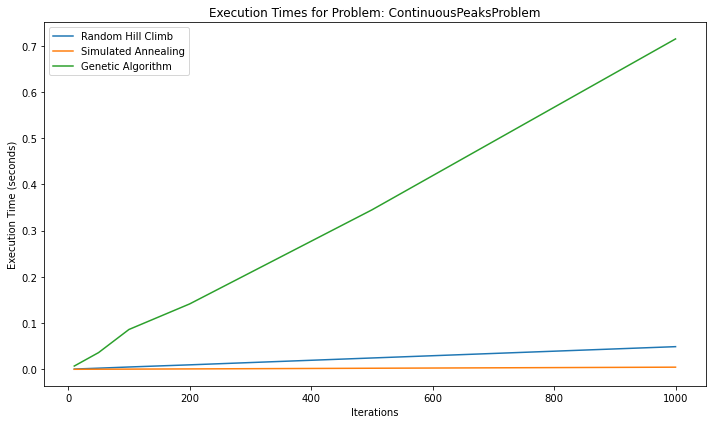

In [45]:
import matplotlib.pyplot as plt
import time

def plot_algorithm_execution_times(problem, max_iterations_range, random_state=None):
    algorithms = {
        "Random Hill Climb": random_hill_climb,
        "Simulated Annealing": simulated_annealing,
        "Genetic Algorithm": genetic_algorithm,
    }
    
    execution_times = {algorithm_name: [] for algorithm_name in algorithms.keys()}
    
    for max_iterations in max_iterations_range:
        for algorithm_name, algorithm_func in algorithms.items():
            start_time = time.time()
            
            # Call the algorithm function
            result = algorithm_func(problem, max_iters=max_iterations, random_state=random_state)
            
            # Check the number of return values
            if len(result) == 2:
                _, execution_time = result  # Unpack values
            elif len(result) == 3:
                _, _, execution_time = result  # Unpack values
            else:
                raise ValueError(f"Unexpected number of return values from {algorithm_name}")
            
            end_time = time.time()
            execution_times[algorithm_name].append((max_iterations, execution_time))
    
    # Create a line graph to visualize execution times over iterations
    plt.figure(figsize=(10, 6))
    for algorithm_name, data in execution_times.items():
        iterations, times = zip(*data)
        plt.plot(iterations, times, label=algorithm_name)
    
    plt.xlabel("Iterations")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Execution Times for Problem: {problem.__class__.__name__}")
    plt.legend()
    plt.tight_layout()
    
    plt.show()

# Example usage:
problem = ContinuousPeaksProblem(length=20, t=5)
max_iterations_range = [10, 50, 100, 200, 500, 1000]
plot_algorithm_execution_times(problem, max_iterations_range, random_state=42)


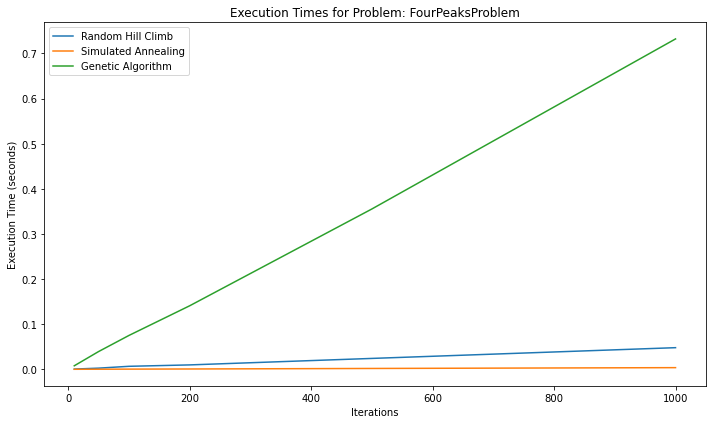

In [46]:
problem= FourPeaksProblem(length=20, t=5)
max_iterations_range = [10, 50, 100, 200, 500, 1000]
plot_algorithm_execution_times(problem, max_iterations_range, random_state=42)

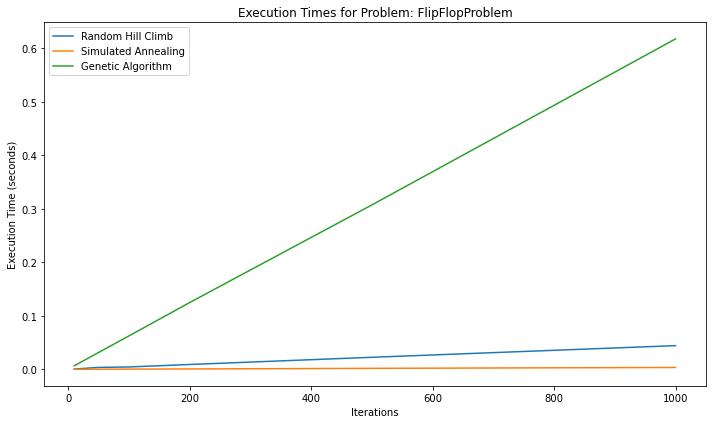

In [47]:
problem = FlipFlopProblem(length=20)
max_iterations_range = [10, 50, 100, 200, 500, 1000]
plot_algorithm_execution_times(problem, max_iterations_range, random_state=42)